In [1]:
%pylab inline

matplotlib.rcParams['figure.figsize'] = (12, 7)
matplotlib.rcParams.update({'figure.autolayout': True})
font = {'size': 12}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


In [2]:
import csv
import pandas as pd

In [3]:
def same_result(row):
    res = False
    if row['norm_score'] < 0 and row['norm_liwc'] < 0:
        res = True
    if row['norm_score'] > 0 and row['norm_liwc'] > 0:
        res = True
    if row['norm_score'] == 0 and row['norm_liwc'] == 0:
        res = True
    return res

###a) 1)

In [4]:
df_a1 = pd.read_csv('results_subtraction_100.csv')

In [5]:
df_a1['same'] = df_a1.apply(same_result, axis=1)
total = df_a1.same.count()
equals = df_a1[df_a1.same == True].count()['same']
different = df_a1[df_a1.same == False].count()['same']
print 'Total:', total
print 'Equals:', equals
print 'Different:', different
print 'Accuracy:', float(equals) * 100 / total

Total: 8996
Equals: 3202
Different: 5794
Accuracy: 35.5935971543


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f519f6c4190>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f519ffe3a10>]], dtype=object)

/home/antonio/.virtualenvs/knowledge/local/lib/python2.7/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


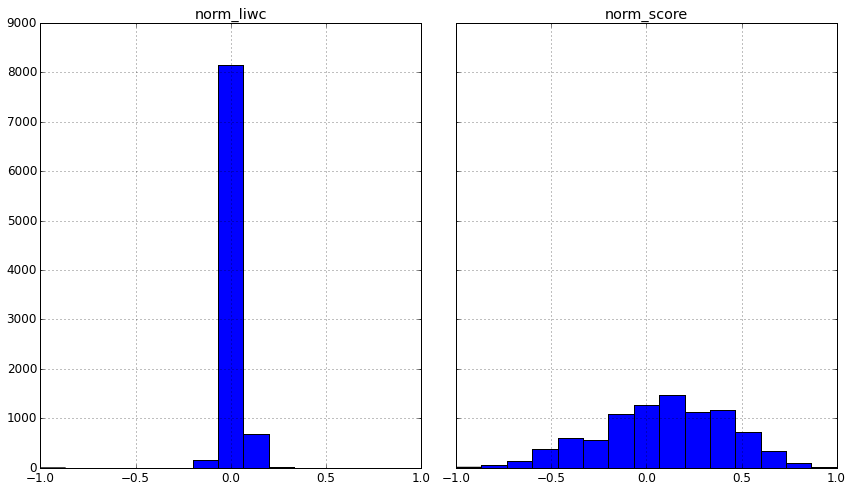

In [6]:
df_a1[['norm_score', 'norm_liwc']].hist(sharey=True, sharex=True, range=[-1, 1], bins=15)

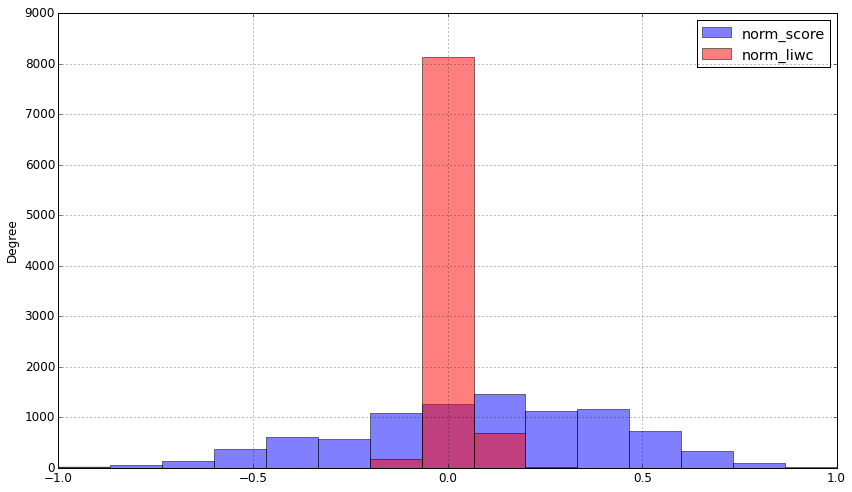

In [7]:
df_a1[['norm_score', 'norm_liwc']].plot(kind='hist', alpha=0.5, color=['b', 'r'], bins=15)

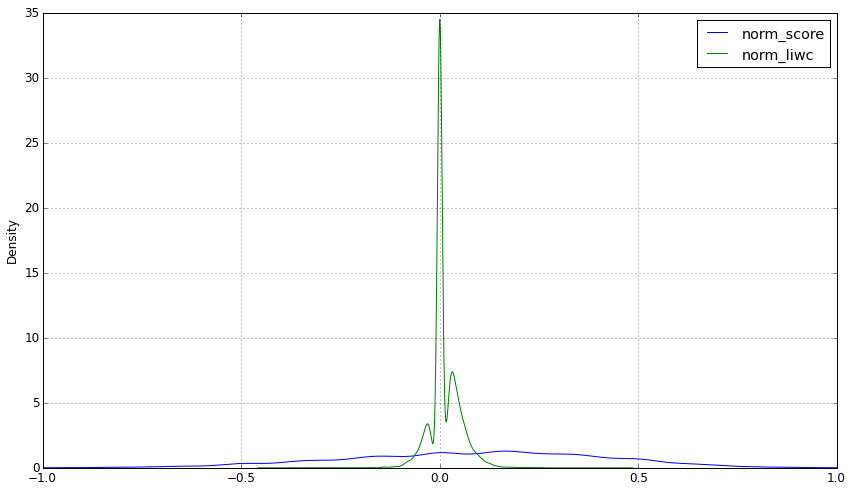

In [8]:
df_a1[['norm_score', 'norm_liwc']].plot(kind='kde', xlim=[-1, 1])

###a) 2)

In [9]:
df_a2 = pd.read_csv('results_minmax_100.csv')

In [10]:
df_a2['same'] = df_a2.apply(same_result, axis=1)
total = df_a2.same.count()
equals = df_a2[df_a2.same == True].count()['same']
different = df_a2[df_a2.same == False].count()['same']
print 'Total:', total
print 'Equals:', equals
print 'Different:', different
print 'Accuracy:', float(equals) * 100 / total

Total: 8996
Equals: 3202
Different: 5794
Accuracy: 35.5935971543


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5198340f90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f51982bb890>]], dtype=object)

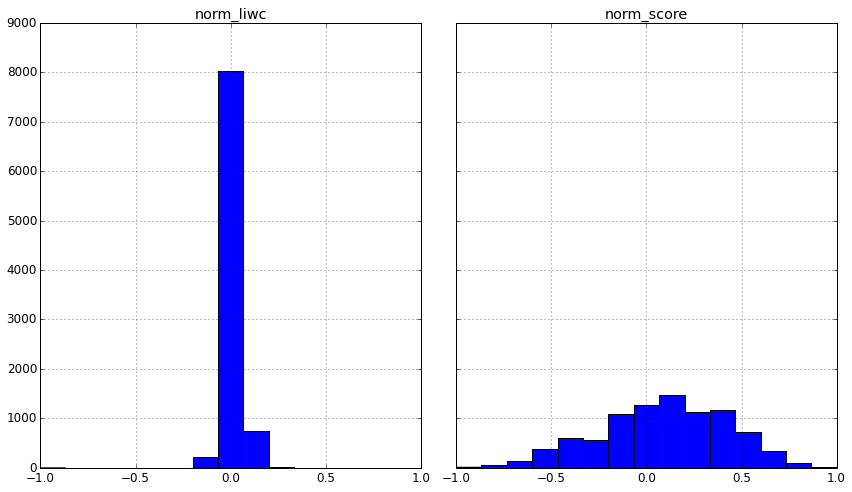

In [11]:
df_a2[['norm_score', 'norm_liwc']].hist(sharey=True, sharex=True, range=[-1, 1], bins=15)

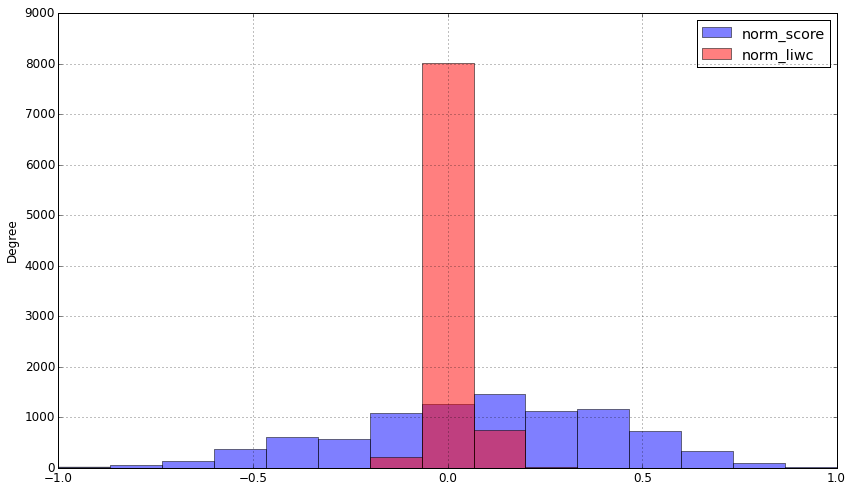

In [12]:
df_a2[['norm_score', 'norm_liwc']].plot(kind='hist', alpha=0.5, color=['b', 'r'], bins=15)

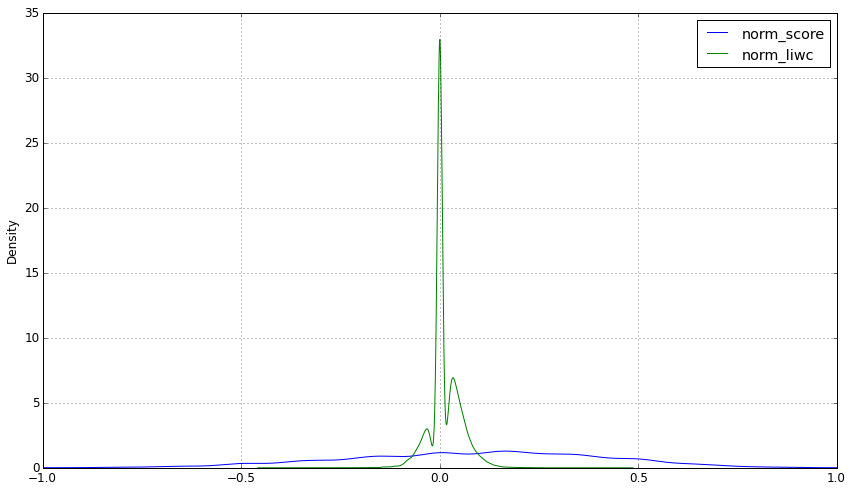

In [13]:
df_a2[['norm_score', 'norm_liwc']].plot(kind='kde', xlim=[-1, 1])

###b) 1)

In [14]:
df_b1 = pd.read_csv('results_subtraction_minmax.csv')

In [15]:
df_b1['same'] = df_b1.apply(same_result, axis=1)
total = df_b1.same.count()
equals = df_b1[df_b1.same == True].count()['same']
different = df_b1[df_b1.same == False].count()['same']
print 'Total:', total
print 'Equals:', equals
print 'Different:', different
print 'Accuracy:', float(equals) * 100 / total

Total: 8996
Equals: 3202
Different: 5794
Accuracy: 35.5935971543


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f51983d7650>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5197c4b410>]], dtype=object)

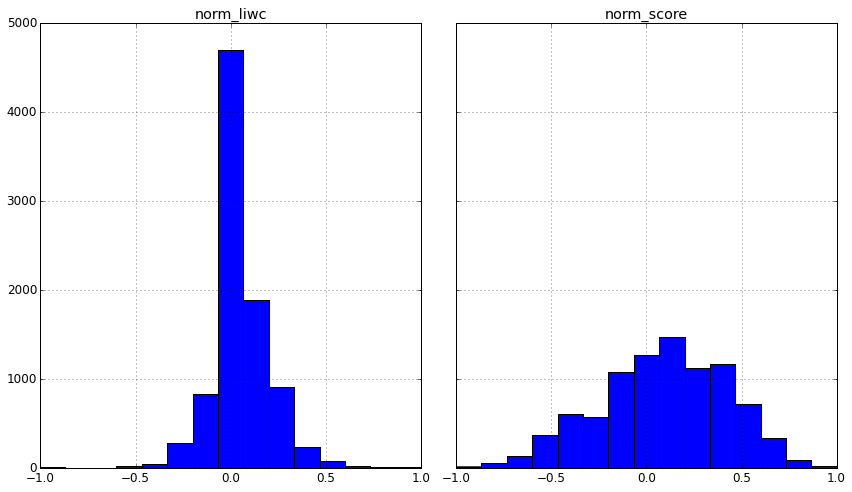

In [16]:
df_b1[['norm_score', 'norm_liwc']].hist(sharey=True, sharex=True, range=[-1, 1], bins=15)

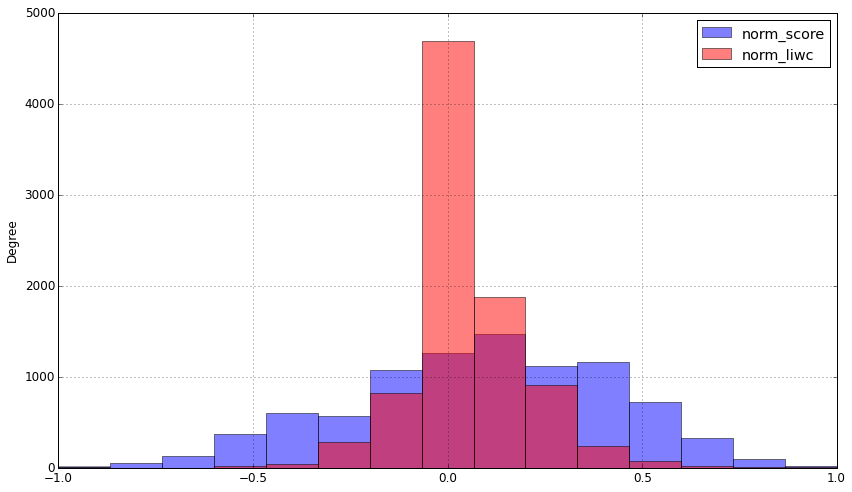

In [17]:
df_b1[['norm_score', 'norm_liwc']].plot(kind='hist', alpha=0.5, color=['b', 'r'], bins=15)

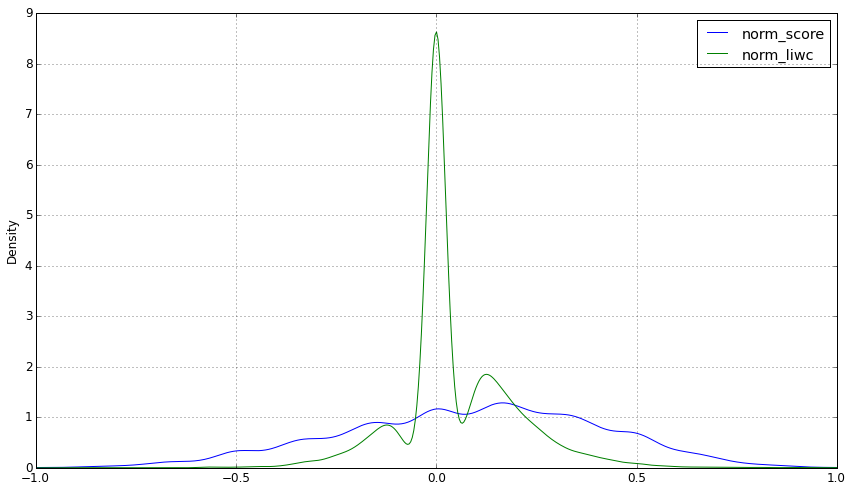

In [18]:
df_b1[['norm_score', 'norm_liwc']].plot(kind='kde', xlim=[-1, 1])

###b) 2)

In [19]:
df_b2 = pd.read_csv('results_minmax_minmax.csv')

In [20]:
df_b2['same'] = df_b2.apply(same_result, axis=1)
total = df_b2.same.count()
equals = df_b2[df_b2.same == True].count()['same']
different = df_b2[df_b2.same == False].count()['same']
print 'Total:', total
print 'Equals:', equals
print 'Different:', different
print 'Accuracy:', float(equals) * 100 / total

Total: 8996
Equals: 3202
Different: 5794
Accuracy: 35.5935971543


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f519756b7d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5196f13c10>]], dtype=object)

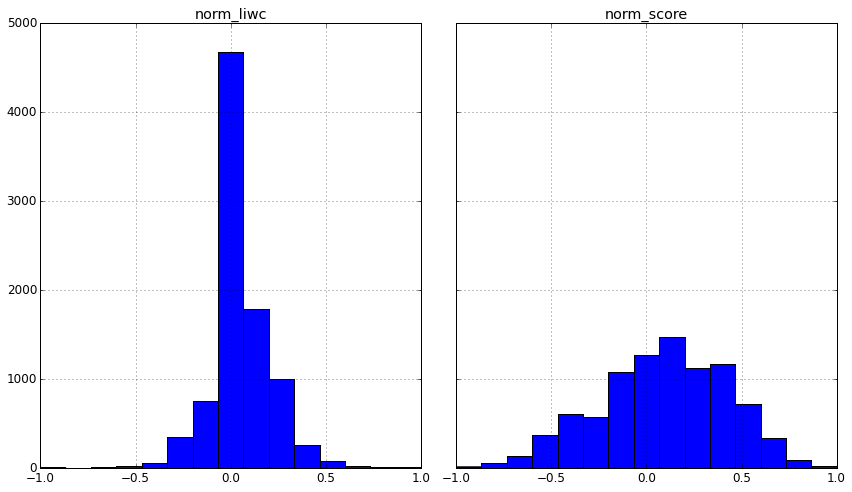

In [22]:
df_b2[['norm_score', 'norm_liwc']].hist(sharey=True, sharex=True, range=[-1, 1], bins=15)

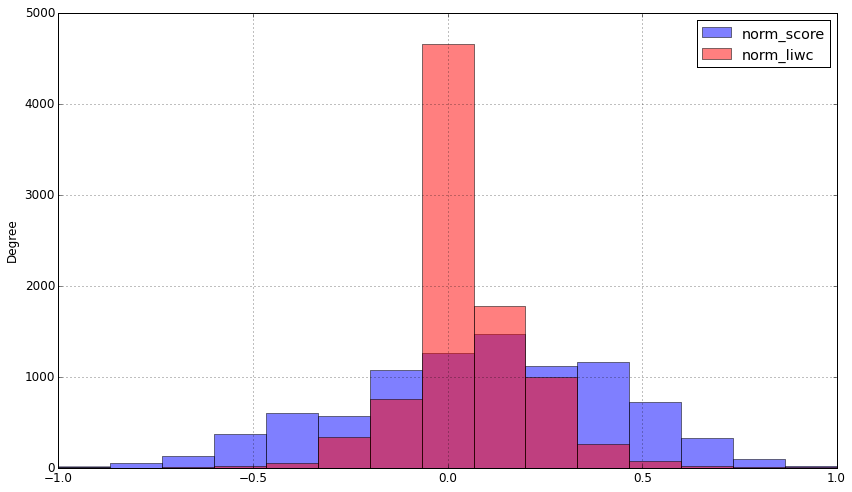

In [23]:
df_b2[['norm_score', 'norm_liwc']].plot(kind='hist', alpha=0.5, color=['b', 'r'], bins=15)

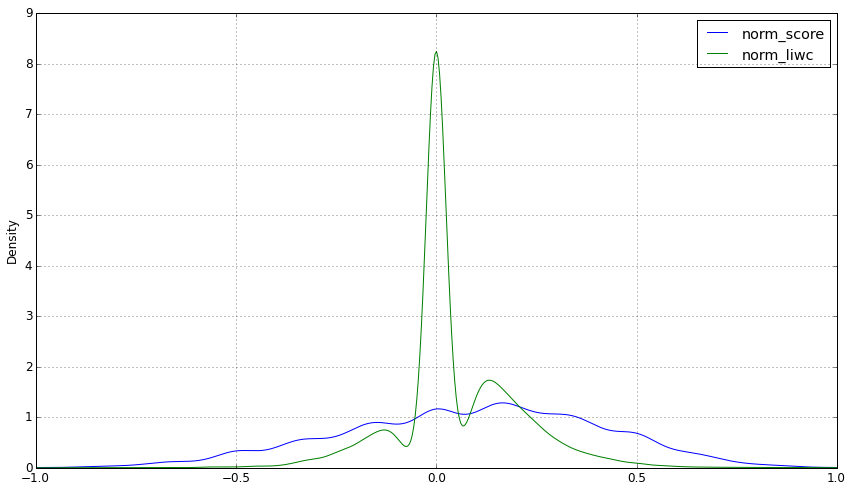

In [24]:
df_b2[['norm_score', 'norm_liwc']].plot(kind='kde', xlim=[-1, 1])

###Normal tests

In [25]:
from statsmodels.stats.diagnostic import normal_ad, kstest_normal

####Anderson-Darling

In [26]:
normal_ad(df_b2['norm_score'])

(24.82852963626101, 0.0)

In [27]:
normal_ad(df_b2['norm_liwc'])

(485.42700854599207, 0.0)

In [28]:
normal_ad(df_b2['score'])

(24.82852963626101, 0.0)

In [29]:
normal_ad(df_b2['liwc'])

(485.42700854599025, 0.0)

In [30]:
df_b2.head()

,#s,sentence,score,liwc,norm_score,norm_liwc,same
0,1,"General Motors will recall nearly 3,200 manua...",-0.666667,0.00,-0.333333,0.0000,False
1,2,"He performs in his D.J. duo New World Punx, w...",0.500000,0.00,0.250000,0.0000,False
2,3,""" And Aim's problem is that many of its larges...",-0.125000,10.00,-0.062500,0.4000,False
3,4,"""'Don't be evil,' he cried, while being chased...",-0.250000,-7.14,-0.125000,-0.2856,True
4,5,"""A lot of companies seem to prefer it to other...",0.333333,0.00,0.166667,0.0000,False


####KS test

In [31]:
kstest_normal(df_b2['norm_score'])

(0.070741426784401595, 4.637567858585372e-121)

In [32]:
kstest_normal(df_b2['norm_liwc'])

(0.26988786385715646, 0.0)

In [33]:
kstest_normal(df_b2['score'])

(0.070741426784401595, 4.637567858585372e-121)

In [34]:
kstest_normal(df_b2['liwc'])

(0.26988786385715646, 0.0)

In [35]:
from scipy.stats.mstats import normaltest

####scipy test

In [36]:
normaltest(df_b2['norm_score'])

(119.06349091527184, 1.3985933201927572e-26)

In [37]:
normaltest(df_b2['norm_liwc'])

(830.38595125464417, 4.8303851447542643e-181)

In [38]:
normaltest(df_b2['score'])

(119.06349091527184, 1.3985933201927572e-26)

In [39]:
normaltest(df_b2['liwc'])

(830.38595125464371, 4.8303851447553656e-181)

In [40]:
from statsmodels.graphics.gofplots import qqplot

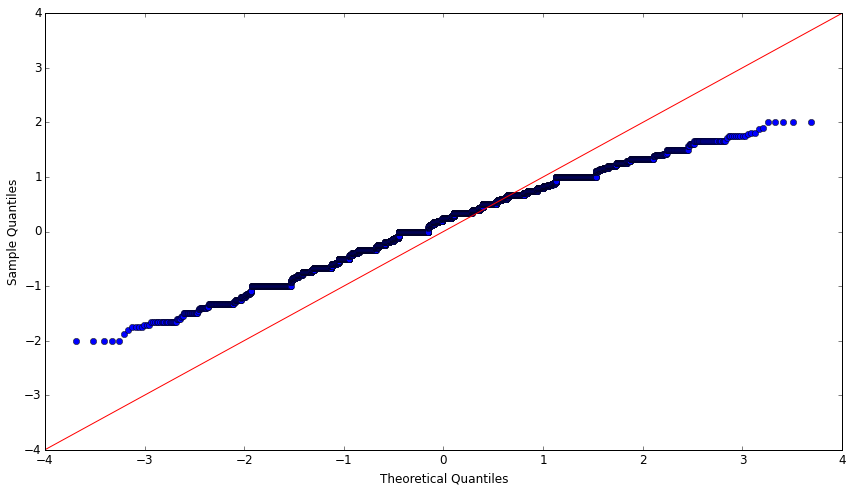

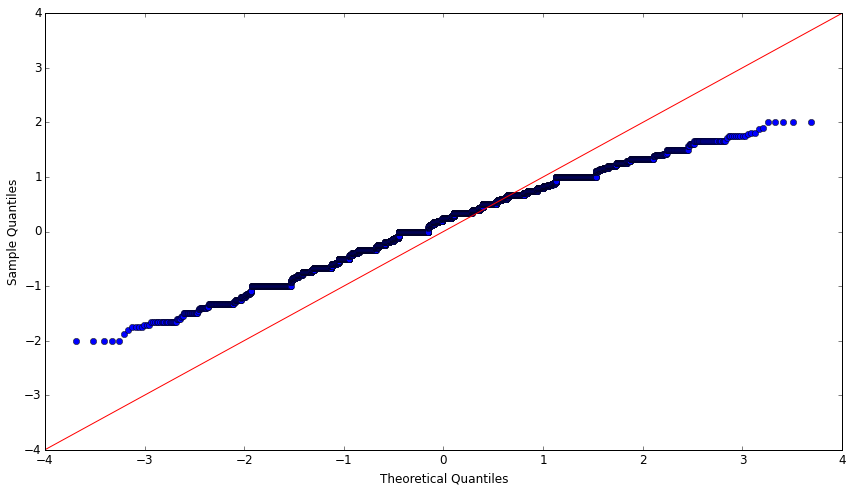

In [41]:
qqplot(df_b2['score'], line='45')

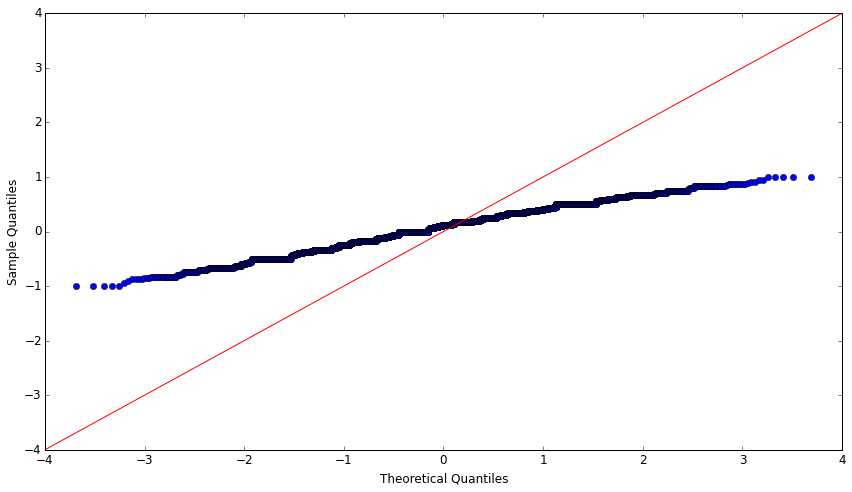

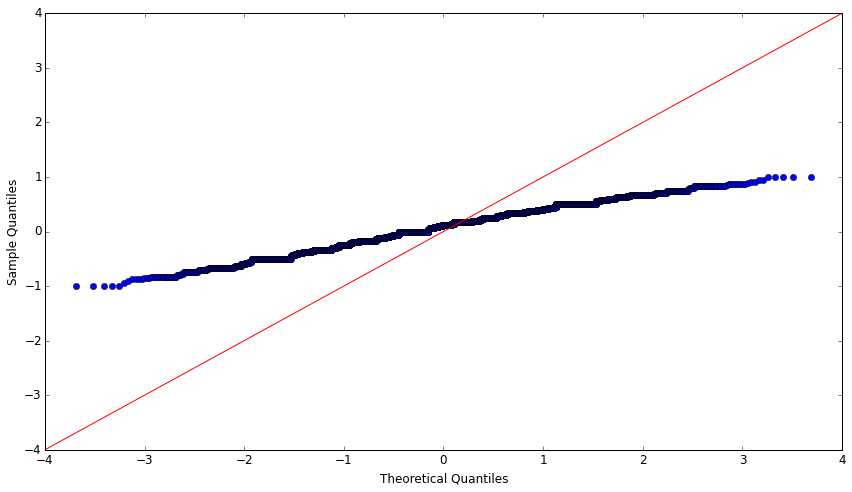

In [42]:
qqplot(df_b2['norm_score'], line='45')

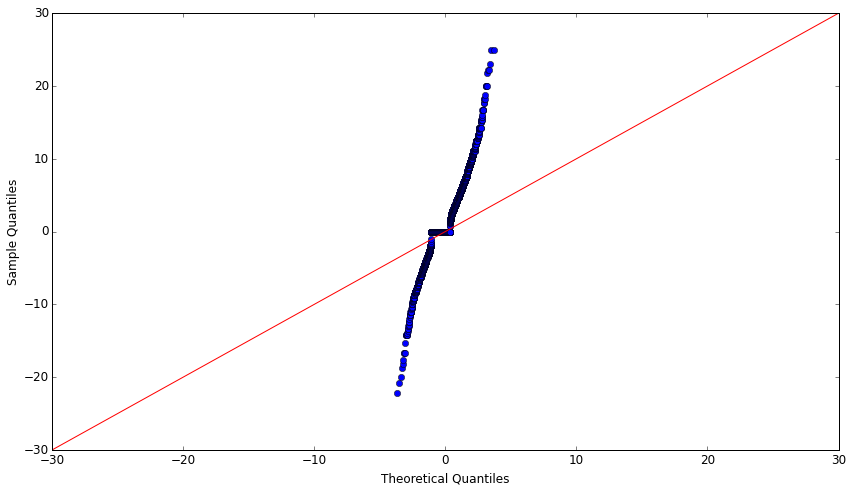

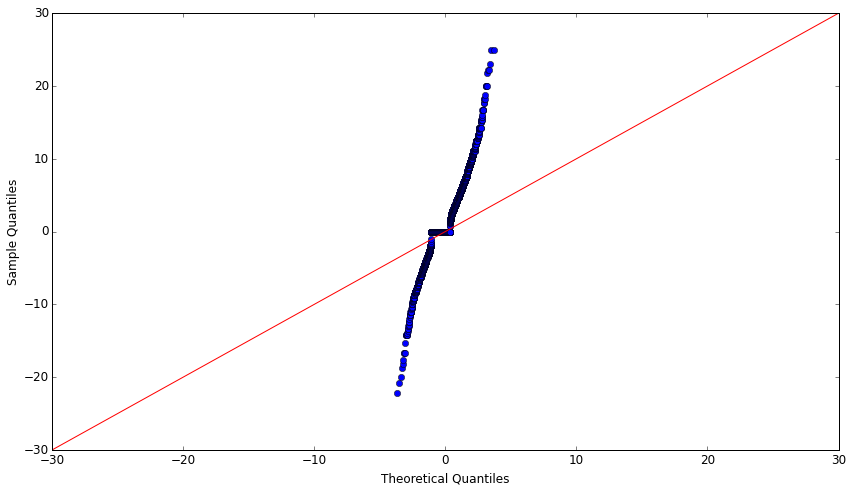

In [43]:
qqplot(df_b2['liwc'], line='45')

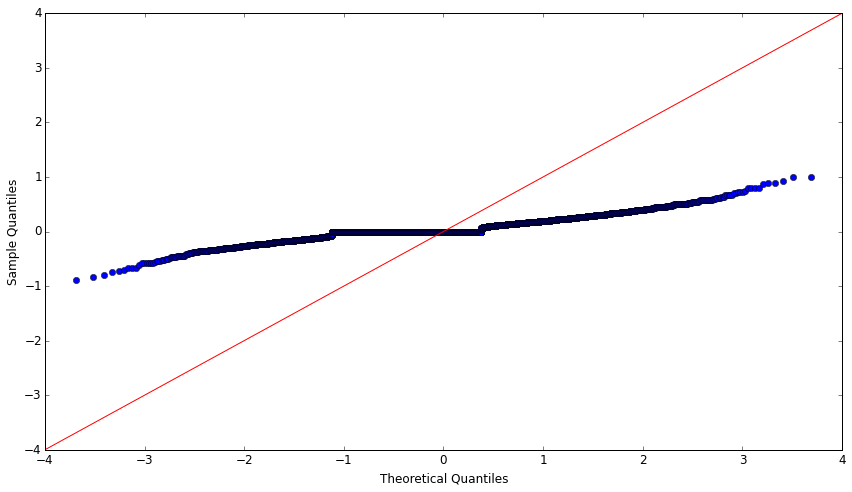

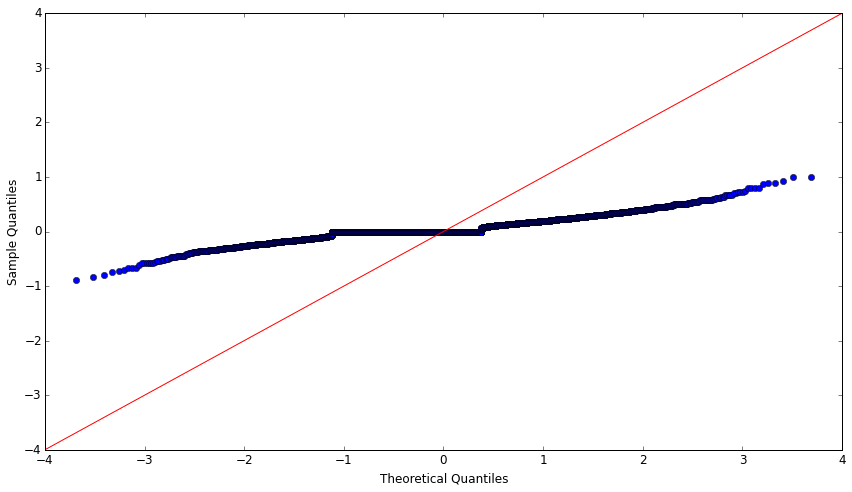

In [44]:
qqplot(df_b2['norm_liwc'], line='45')

In [45]:
from scipy.stats import shapiro

In [46]:
shapiro(df_b2['score'])

/home/antonio/.virtualenvs/knowledge/local/lib/python2.7/site-packages/scipy/stats/morestats.py:997: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.991511881351471, 9.277550768234236e-23)

In [47]:
from scipy.stats import skew, kurtosis, skewtest, kurtosistest

In [48]:
skew(df_b2['score'])

-0.23996911967370574

In [49]:
skewtest(df_b2['score'])

(-9.1710106663937445, 4.6860471546981458e-20)

In [50]:
kurtosis(df_b2['score'])

-0.2653947607262741

In [51]:
kurtosistest(df_b2['score'])

(-5.9123645246351328, 3.3723118877765028e-09)

In [52]:
from scipy.stats import chisquare, ks_2samp

In [53]:
ks_2samp(df_b2['score'], df_b2['liwc'])

(0.34804357492218763, 0.0)

###DEMO

In [54]:
df_runs = pd.read_json('tasks_runs_export.json')
df_runs.head()

,app_id,calibration,created,finish_time,id,info,task_id,timeout,user_id,user_ip
0,2,NaN,2015-01-15T20:10:02.754972,2015-01-15 20:10:02.755004,11153,pos,52763,NaN,1068,NaN
1,2,NaN,2015-01-15T20:10:33.135575,2015-01-15 20:10:33.135595,11154,pos,52764,NaN,1068,NaN
2,2,NaN,2015-01-19T05:07:13.067430,2015-01-19 05:07:13.067454,11155,neg,52765,NaN,1068,NaN
3,2,NaN,2015-01-19T15:03:52.019558,2015-01-19 15:03:52.019577,11156,pos,52763,NaN,870,NaN
4,2,NaN,2015-01-19T15:04:07.983599,2015-01-19 15:04:07.983617,11157,neg,52764,NaN,870,NaN


In [55]:
df_task = pd.read_json('tasks_export.json')
df_task.head()

,app_id,calibration,created,id,info,n_answers,priority_0,quorum,state
0,2,0,2015-01-15T20:07:01.968888,61119,"{u'search_words': u'executive', u'appears_in_s...",3,0,0,ongoing
1,2,0,2015-01-15T20:07:04.148649,61136,"{u'search_words': u'samsung', u'appears_in_sen...",3,0,0,ongoing
2,2,0,2015-01-15T19:49:01.874219,52763,"{u'search_words': u'executive', u'appears_in_s...",3,0,0,ongoing
3,2,0,2015-01-15T19:55:52.545549,55987,"{u'search_words': u'founder', u'appears_in_sen...",3,0,0,completed
4,2,0,2015-01-15T19:55:55.962911,56014,"{u'search_words': u'nike', u'appears_in_senten...",3,0,0,completed


In [56]:
df_user = pd.read_csv('bossa_users.csv')
df_user.head()

,user_id,user_name
0,2,jzambra3
1,3,Dago
2,1,versae
3,4,123
4,206,3655


In [57]:
df_demo = pd.read_excel('demographics.xlsx', converters={'ID_code': str})
df_demo.head()

,StartDate,EndDate,ID_code,Age,Gender,Country_Birth,Postal_Code,Primary_Language,Faculty
0,2015-01-19 09:21:14,2015-01-19 10:04:38,4477,18,1,canada,K7P,English,9
1,2015-01-19 09:21:36,2015-01-19 10:04:35,4708,18,1,canada,n0n,english,6
2,2015-01-19 09:22:29,2015-01-19 10:03:53,5245,19,1,Canada,N6A,English,10
3,2015-01-19 09:22:39,2015-01-19 10:04:03,5605,18,1,United Arab Emirates,L3S,Tamil,10
4,2015-01-19 09:22:49,2015-01-19 10:03:33,5662,18,1,Canada,N6K,English,9


In [58]:
df_demographics = pd.merge(df_runs, df_task, left_on='task_id', right_on='id', suffixes=('_runs', '_task'))
df_demographics = df_demographics.drop('id_task', 1)
df_demographics = pd.merge(df_demographics, df_user, on='user_id', suffixes=('', '_user'))
df_demographics = pd.merge(df_demographics, df_demo, left_on='user_name', right_on='ID_code', suffixes=('', '_demo'))
df_demographics = df_demographics.drop('ID_code', 1)
df_demographics.head()

,app_id_runs,calibration_runs,created_runs,finish_time,id_runs,info_runs,task_id,timeout,user_id,user_ip,...,state,user_name,StartDate,EndDate,Age,Gender,Country_Birth,Postal_Code,Primary_Language,Faculty
0,2,NaN,2015-01-19T15:03:52.019558,2015-01-19 15:03:52.019577,11156,pos,52763,NaN,870,NaN,...,ongoing,5662,2015-01-19 09:22:49,2015-01-19 10:03:33,18,1,Canada,N6K,English,9
1,2,NaN,2015-01-19T15:04:07.983599,2015-01-19 15:04:07.983617,11157,neg,52764,NaN,870,NaN,...,ongoing,5662,2015-01-19 09:22:49,2015-01-19 10:03:33,18,1,Canada,N6K,English,9
2,2,NaN,2015-01-19T15:04:14.584194,2015-01-19 15:04:14.584212,11158,pos,52765,NaN,870,NaN,...,ongoing,5662,2015-01-19 09:22:49,2015-01-19 10:03:33,18,1,Canada,N6K,English,9
3,2,NaN,2015-01-19T15:04:34.182159,2015-01-19 15:04:34.182193,11161,pos,52766,NaN,870,NaN,...,ongoing,5662,2015-01-19 09:22:49,2015-01-19 10:03:33,18,1,Canada,N6K,English,9
4,2,NaN,2015-01-19T15:04:44.380438,2015-01-19 15:04:44.380459,11164,pos,52767,NaN,870,NaN,...,ongoing,5662,2015-01-19 09:22:49,2015-01-19 10:03:33,18,1,Canada,N6K,English,9


In [59]:
df_sub = df_demographics[['user_id', 'info_runs', 'Age', 'Gender', 'Country_Birth']]
sentence_ids = pd.Series([x['sentence_id'] for x in df_demographics['info_task']], index=df_sub.index)
df_sub['sentence_id'] = sentence_ids
cols = list(df_sub.columns)
cols[1] = 'polarity'
df_sub.columns = cols
df_sub.head()

/home/antonio/.virtualenvs/knowledge/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,user_id,polarity,Age,Gender,Country_Birth,sentence_id
0,870,pos,18,1,Canada,1
1,870,neg,18,1,Canada,2
2,870,pos,18,1,Canada,3
3,870,pos,18,1,Canada,4
4,870,pos,18,1,Canada,5


####Polarity by country and age

In [166]:
df_sub.groupby(['Country_Birth', 'Age', 'polarity']).count()

user_id  Gender  sentence_id
Country_Birth            Age polarity                              
Australia                18  neg            54      54           54
                             neu             7       7            7
                             pos            39      39           39
                             vneg           57      57           57
                             vpos           37      37           37
Belarus                  18  neg            40      40           40
                             neu            73      73           73
                             pos            74      74           74
                             vneg           18      18           18
                             vpos           41      41           41
CHINA                    19  neg            40      40           40
                             neu            26      26           26
                             pos            52      52           52
                             vneg            2       2            2
                             vpos            9       9            9
Canada                   17  neg           136     136          136
                             neu           140     140          140
                             pos           205     205          205
                             vneg           54      54           54
                             vpos          120     120          120
                         18  neg          5965    5965         5965
                             neu          4727    4727         4727
                             pos          8776    8776         8776
                             vneg         1531    1531         1531
                             vpos         2168    2168         2168
                         19  neg           880     880          880
                             neu           979     979          979
                             pos          1438    1438         1438
                             vneg          246     246          246
                             vpos          421     421          421
...                                        ...     ...          ...
United States            18  vpos            3       3            3
United States of America 19  neg            35      35           35
                             neu            54      54           54
                             pos            37      37           37
                             vneg            8       8            8
                             vpos            5       5            5
VIETNAM                  19  neg            18      18           18
                             neu            86      86           86
                             pos            30      30           30
                             vpos            7       7            7
canada                   18  neg           323     323          323
                             neu           336     336          336
                             pos           453     453          453
                             vneg          122     122          122
                             vpos          193     193          193
                         19  neg            21      21           21
                             neu           258     258          258
                             pos            46      46           46
                             vneg            1       1            1
                             vpos            2       2            2
china                    18  neg            40      40           40
                             neu           333     333          333
                             pos            99      99           99
                             vneg            6       6            6
                             vpos           21      21           21
                         19  neg           202     202          202
                           

####Polarity by country and gender

In [62]:
df_sub.groupby(['Country_Birth', 'Gender', 'polarity']).count()

user_id   Age  sentence_id
Country_Birth            Gender polarity                            
Australia                2      neg            54    54           54
                                neu             7     7            7
                                pos            39    39           39
                                vneg           57    57           57
                                vpos           37    37           37
Belarus                  1      neg            40    40           40
                                neu            73    73           73
                                pos            74    74           74
                                vneg           18    18           18
                                vpos           41    41           41
CHINA                    2      neg            40    40           40
                                neu            26    26           26
                                pos            52    52           52
                                vneg            2     2            2
                                vpos            9     9            9
Canada                   1      neg          3965  3965         3965
                                neu          3963  3963         3963
                                pos          5771  5771         5771
                                vneg         1163  1163         1163
                                vpos         1656  1656         1656
                         2      neg          3392  3392         3392
                                neu          1998  1998         1998
                                pos          5127  5127         5127
                                vneg          788   788          788
                                vpos         1243  1243         1243
China                    1      neg           200   200          200
                                neu           554   554          554
                                pos           385   385          385
                                vneg           58    58           58
                                vpos          102   102          102
...                                           ...   ...          ...
United States            1      vpos            3     3            3
United States of America 2      neg            35    35           35
                                neu            54    54           54
                                pos            37    37           37
                                vneg            8     8            8
                                vpos            5     5            5
VIETNAM                  1      neg            18    18           18
                                neu            86    86           86
                                pos            30    30           30
                                vpos            7     7            7
canada                   1      neg           323   323          323
                                neu           336   336          336
                                pos           453   453          453
                                vneg          122   122          122
                                vpos          193   193          193
                         2      neg            21    21           21
                                neu           258   258          258
                                pos            46    46           46
                                vneg            1     1            1
                                vpos            2     2            2
china                    1      neg           143   143          143
                                neu           333   333          333
                                pos           248   248          248
                                vneg           20    20           20
                                vpos           41    41           41
                         2      neg     

####Polarity by country and gender (freqs)

In [163]:
from collections import defaultdict

d_pol_country_gender = {
    'vneg': defaultdict(dict),
    'neg': defaultdict(dict),
    'neu': defaultdict(dict),
    'pos': defaultdict(dict),
    'vpos': defaultdict(dict),
}
d = df_sub.groupby(['Country_Birth', 'Gender', 'polarity'])['polarity'].describe()
for k in d.keys():
    if k[3] == 'count':
        country = k[0]
        gender = k[1]
        polarity = k[2]
        count = k[3]
        d_pol_country_gender[polarity][country][gender] = d[k]

for k in d_pol_country_gender:
    d_pol_country_gender[k] = dict(d_pol_country_gender[k])

####Polarity by country and age (freqs)

In [161]:
from collections import defaultdict

d_pol_country_age = {
    'vneg': defaultdict(dict),
    'neg': defaultdict(dict),
    'neu': defaultdict(dict),
    'pos': defaultdict(dict),
    'vpos': defaultdict(dict),
}
d = df_sub.groupby(['Country_Birth', 'Age', 'polarity'])['polarity'].describe()
for k in d.keys():
    if k[3] == 'count':
        country = k[0]
        age = k[1]
        polarity = k[2]
        count = k[3]
        d_pol_country_age[polarity][country][age] = d[k]

for k in d_pol_country_age:
    d_pol_country_age[k] = dict(d_pol_country_age[k])

In [156]:
df_pol_country_gender = pd.DataFrame(d_pol_country_gender)
df_pol_country_gender.head()

,neg,neu,pos,vneg,vpos
Australia,{2: 54},{2: 7},{2: 39},{2: 57},{2: 37}
Belarus,{1: 40},{1: 73},{1: 74},{1: 18},{1: 41}
CHINA,{2: 40},{2: 26},{2: 52},{2: 2},{2: 9}
Canada,"{1: 3965, 2: 3392}","{1: 3963, 2: 1998}","{1: 5771, 2: 5127}","{1: 1163, 2: 788}","{1: 1656, 2: 1243}"
China,"{1: 200, 2: 958}","{1: 554, 2: 956}","{1: 385, 2: 1655}","{1: 58, 2: 164}","{1: 102, 2: 221}"


In [164]:
df_pol_country_age = pd.DataFrame(d_pol_country_age)
df_pol_country_age.head()

,neg,neu,pos,vneg,vpos
Australia,{18: 54},{18: 7},{18: 39},{18: 57},{18: 37}
Belarus,{18: 40},{18: 73},{18: 74},{18: 18},{18: 41}
CHINA,{19: 40},{19: 26},{19: 52},{19: 2},{19: 9}
Canada,"{33: 46, 38: 48, 17: 136, 18: 5965, 19: 880, 2...","{33: 14, 38: 20, 17: 140, 18: 4727, 19: 979, 2...","{33: 39, 38: 44, 17: 205, 18: 8776, 19: 1438, ...","{33: 19, 38: 6, 17: 54, 18: 1531, 19: 246, 20:...","{33: 26, 38: 7, 17: 120, 18: 2168, 19: 421, 20..."
China,"{18: 481, 19: 547, 20: 9, 21: 37, 22: 53, 24: 31}","{18: 491, 19: 732, 20: 78, 21: 2, 22: 81, 24: ...","{18: 839, 19: 786, 20: 17, 21: 288, 22: 79, 24...","{24: 6, 18: 113, 19: 75, 20: 4, 22: 24}","{18: 178, 19: 77, 20: 6, 21: 10, 22: 38, 24: 14}"
